In [1]:
import pandas as pd
fish = pd.read_csv('../data/fish.csv')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sc.fit(train_scaled, train_target)
print(f'train score: {sc.score(train_scaled, train_target)}')
print(f'test score: {sc.score(test_scaled, test_target)}')

train score: 0.8403361344537815
test score: 0.8


In [6]:
sc.partial_fit(train_scaled, train_target) # additional training
print(f'train score: {sc.score(train_scaled, train_target)}')
print(f'test score: {sc.score(test_scaled, test_target)}')

train score: 0.907563025210084
test score: 0.925


In [7]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

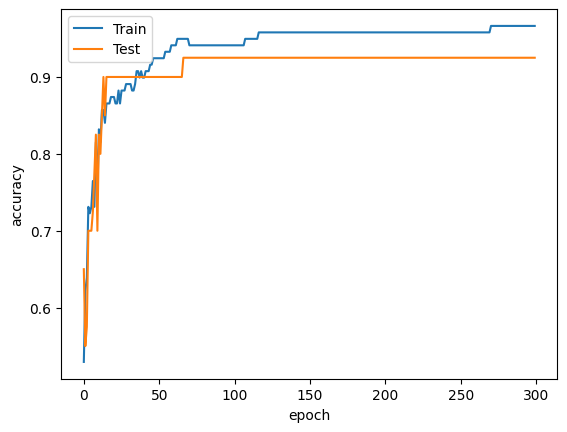

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_score, label='Train')
plt.plot(test_score, label='Test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(f'train score: {sc.score(train_scaled, train_target)}')
print(f'test score: {sc.score(test_scaled, test_target)}')

train score: 0.957983193277311
test score: 0.925


In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(f'train score: {sc.score(train_scaled, train_target)}')
print(f'test score: {sc.score(test_scaled, test_target)}')

train score: 0.9495798319327731
test score: 0.925
